<h1> First homework assignment<h1>
    <h2>Statistical data analysis course - University of Warsaw<h2>

Data set laptops.csv contains:
- inches
- weight
- price_euros
- company – (1 – Acer, 2 – Asus, 3 – Dell, 4 – HP, 5 – Lenovo, 6 – MSI, 7 – Toshiba)
- typename – (1 – 2w1, 2 – gaming, 3 – netbook, 4 – notebook, 5 – ultrabook, 6 – stacja robocza)
- ram – (1 – 4GB, 2 – 8GB, 3 – 16GB, 4 – 32GB)

<h2> Importing data <h2>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import chi2_contingency #for tests
from scipy.stats import ttest_ind #for tests
from scipy.stats import levene #for tests
from scipy.stats import variation
from scipy.stats import t as student
import matplotlib.pyplot as plt

dataSet = pd.read_csv('laptops.csv', sep=";")
dataSet.describe()

,inches,weight,price_euros,company,typename,ram
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,15.077321,2.069405,1128.914991,3.710158,3.539405,1.873905
std,1.385856,0.660224,664.678267,1.489391,1.255218,0.715328
min,10.100000,0.690000,209.000000,1.000000,1.000000,1.000000
25%,14.000000,1.600000,619.612503,3.000000,2.000000,1.000000
50%,15.600000,2.060000,986.500000,4.000000,4.000000,2.000000
75%,15.600000,2.330000,1485.827515,5.000000,4.000000,2.000000
max,18.400000,4.700000,4899.000000,7.000000,6.000000,4.000000


In [2]:
dataSet.head()

,inches,weight,price_euros,company,typename,ram
0,15.6,1.86,575.000000,4,4,2
1,15.6,2.10,400.000000,1,4,1
2,14.0,1.30,1495.000000,2,5,3
3,14.0,1.60,770.000000,1,5,2
4,15.6,1.86,393.899994,4,4,1


In [3]:
dataSet.dtypes

inches         float64
weight         float64
price_euros    float64
company          int64
typename         int64
ram              int64
dtype: object

<h2>Verify following hypothieses:<h2>

<h3>a) The amount of RAM used in a laptop depends on its manufacturer.<h3>

**Chi-square test** sprawdza zależność między zmiennymi. \

dla danej komórki wartość oczekiwana: $e = \frac{row.sum*col.sum}{grand.total}$ \
Chi-square statistic: ${\chi}^2 = \sum \frac{(o-e)^2}{e}$, gdzie o - obserwacja, e - wartosc oczekiwana

Hipoteza zerowa $H_0$: Stosowana ilość RAM w laptopie jest  **niezależna** od jego producenta.\
Hipoteza alternatywna $H_1$: Stosowana ilość RAM w laptopie jest **zależna** od jego producenta.\

In [4]:
memory = dataSet["ram"]
company = dataSet["company"] 

In [5]:
TAB = pd.crosstab(company, memory, margins=True)
type(TAB)
TAB

ram,1,2,3,4,All
company,,,,,
1,57,33,4,0,94
2,45,61,35,3,144
3,63,161,54,7,285
4,90,142,13,0,245
5,89,141,39,3,272
6,0,22,31,1,54
7,14,25,8,1,48
All,358,585,184,15,1142


In [6]:

TOTAL = int(TAB.values[7:8, 4:5])

expected = np.asarray([TAB.values[7:8,0:4][0]*int(TAB.values[i-1:i,4:5])/TOTAL for i in np.arange(1,8)])

In [7]:
expected

array([[ 29.4676007 ,  48.15236427,  15.14535902,   1.23467601],
       [ 45.14185639,  73.76532399,  23.20140105,   1.89141856],
       [ 89.34325744, 145.9938704 ,  45.91943958,   3.74343257],
       [ 76.80385289, 125.50350263,  39.47460595,   3.21803853],
       [ 85.26795096, 139.33450088,  43.82486865,   3.57267951],
       [ 16.92819615,  27.6619965 ,   8.70052539,   0.70928196],
       [ 15.04728546,  24.58844133,   7.73380035,   0.63047285]])

In [8]:
observed=np.asarray(TAB.values[0:7,0:4])
type(observed)==type(expected)

True

In [9]:
#test statistic
chi_sq = np.sum(np.square(np.subtract(observed, expected))/expected)
chi_sq

164.23407357615477

In [10]:
alpha = 0.1
degFreed = (observed.shape[0]-1)*(observed.shape[1]-1) #degrees of freedom
pval = 1-chi2.cdf(chi_sq, degFreed)
quantile = chi2.ppf(1-alpha, degFreed)

degFreed

18

In [11]:
pval

0.0

In [12]:
pval > alpha

False

In [13]:
quantile

25.98942308263721

In [14]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

Reject the null hypothesis H0 in favor of the alternative hypothesis


In [15]:
#built-in function
chi2_contingency(observed)

(164.23407357615477,
 1.2327384246498041e-25,
 18,
 array([[ 29.4676007 ,  48.15236427,  15.14535902,   1.23467601],
        [ 45.14185639,  73.76532399,  23.20140105,   1.89141856],
        [ 89.34325744, 145.9938704 ,  45.91943958,   3.74343257],
        [ 76.80385289, 125.50350263,  39.47460595,   3.21803853],
        [ 85.26795096, 139.33450088,  43.82486865,   3.57267951],
        [ 16.92819615,  27.6619965 ,   8.70052539,   0.70928196],
        [ 15.04728546,  24.58844133,   7.73380035,   0.63047285]]))

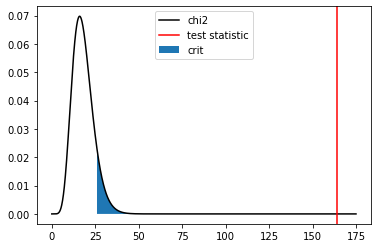

In [16]:
fig, ax = plt.subplots()
ar = np.arange(0, 175, 0.1)
ax.plot(ar, chi2.pdf(ar, degFreed), color='black', label='chi2')
section = np.arange(quantile, 175, 0.1)
ax.axvline(x=chi_sq, color='red', label='test statistic')
ax.fill_between(section, chi2.pdf(section, degFreed), label='crit')
ax.legend()

**Ilość pamięci RAM zależy od producenta** (wartość statystyki testowej wpada do obszaru krytycznego $(25.98942308263721, \infty)$ oraz p-value jest mniejsze niż nasz ustalony poziom istotności $\alpha = 10%$).

<h3>b) RAM distribution in HP and Lenovo notebooks is the same.<h3>

**Test of Two Variances**/ **F-test of equality of variances** sprawdza hipotezę, że próby pochodzą z populacji o jednakowych wariancjach. \

$F=\frac{S_X^2}{S_Y^2}$, gdzie $S_X^2$ i $S_Y^2$ to wariancje próbkowe.

Hipoteza zerowa $H_0$: Równe wariancje. \
Hipoteza alternatywna $H_1$: Różne wariancje. 

In [17]:
LenovoRAM = np.asarray(dataSet.loc[dataSet["company"]==5,"ram"])
HPRAM = np.asarray(dataSet.loc[dataSet["company"]==4,"ram"])

In [18]:
n = len(LenovoRAM)
m = len(HPRAM)

#unbiased variance estimators
unbiased_est1 = 1/(n-1)*np.sum(np.square(LenovoRAM-[np.mean(LenovoRAM)]*n)) 
unbiased_est2 = 1/(m-1)*np.sum(np.square(HPRAM-[np.mean(HPRAM)]*m)) 

#fisher's test
F = unbiased_est1/unbiased_est2 # with Snedecor's F distribution

alpha = 0.1
pval = 1-f.cdf(F, n-1, m-1) #right-tailed
quantile = f.ppf(1-alpha, n-1, m-1)

F

1.5183141081933365

In [19]:
pval

0.00045564886080551315

In [20]:
quantile

1.1743156776428112

In [21]:
pval > alpha

False

In [22]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

Reject the null hypothesis H0 in favor of the alternative hypothesis


In [23]:
#built-in function
levene(LenovoRAM, HPRAM)

LeveneResult(statistic=2.591295038277229, pvalue=0.10806519718662788)

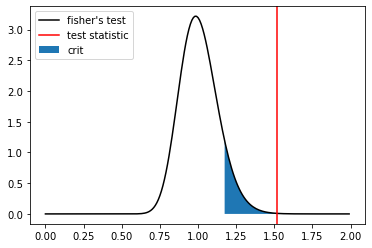

In [24]:
fig, ax = plt.subplots()
ar = np.arange(0, 2, 0.01)
ax.plot(ar, f.pdf(ar, n-1, m-1), color='black', label='fisher\'s test')
section = np.arange(quantile, 2, 0.01)
ax.axvline(x=F, color='red', label='test statistic')
ax.fill_between(section, f.pdf(section, n-1, m-1), label='crit')
ax.legend()

**Odrzucamy hipotezę zerową** ponieważ wartość testu wpada do obszaru krytycznego $(1.3393083873860143, \infty)$ / p-value jest mniejsze niż ustalony poziom istotności $\alpha = 0.1$. **Rozkład stosowanych pamięci RAM w notebookach HP i Lenovo nie jest taki sam.**

<h3>c) The average log prices of a Dell and HP notebook are equal.<h3>

**Independent two-sample t-test** wykorzystujemy, gdy chcemy porównać dwie grupy pod względem jakiejś zmiennej ilościowej.\

$t = \frac{\overline{X}-\overline{Y}}{\sqrt{\frac{s_X^2}{n_X}+\frac{s_Y^2}{n_Y}}}$, gdzie $\overline{X}$, $\overline{Y}$ - średnie arytmetyczne, $s_X^2$, $s_Y^2$ - nieobciążone estymatory wariancji, $n_X$, $n_Y$ - liczby obserwacji

Hipoteza zerowa $H_0$: Średnia zlogarytmowana cena notebooka Dell jest taka sama jak średnia zlogarytmowana cena notebooka HP.\
Hipoteza alternatywna $H_1$: Średnie zlogarytmowane ceny notebooków różnią się.\

In [25]:
dellPrices = np.asarray(dataSet.loc[dataSet["company"]==3,"price_euros"])
hpPrices = np.asarray(dataSet.loc[dataSet["company"]==4,"price_euros"])

In [26]:
logDellPrices = np.log(dellPrices)
logHpPrices = np.log(hpPrices)

n = len(dellPrices)
m = len(hpPrices)

variation(logDellPrices) != variation(logHpPrices)

True

In [27]:
#unbiased variance estimators
unbiased_est1 = 1/(n-1)*np.sum(np.square(logDellPrices-[np.mean(logDellPrices)]*n)) 
unbiased_est2 = 1/(m-1)*np.sum(np.square(logHpPrices-[np.mean(logHpPrices)]*m)) 

In [28]:
a = unbiased_est1/n+unbiased_est2/m
t = (np.mean(logDellPrices)-np.mean(logHpPrices))/np.sqrt(a) 
t #test statistic

2.185085461917259

In [29]:
#two-tailed
pval = student.sf(t, n+m-2)*2
pval

0.029321386035646796

In [30]:
lowerBound = student.ppf(alpha, n+m-2)
upperBound = student.ppf(1-alpha, n+m-2)
print(f"confidence interval = ({lowerBound}, {upperBound})")

confidence interval = (-1.2831569953306763, 1.2831569953306765)


In [31]:
if(pval<alpha):
    print("Reject the null hypothesis H0 in favor of the alternative hypothesis")
else:
    print("There is insufficient evidence")

Reject the null hypothesis H0 in favor of the alternative hypothesis


In [32]:
#built-in function
ttest_ind(logDellPrices, logHpPrices)

Ttest_indResult(statistic=2.1964057024205275, pvalue=0.02849691999099827)

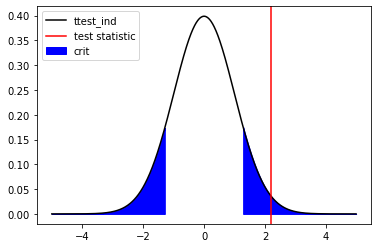

In [33]:
fig, ax = plt.subplots()
ar = np.arange(-5, 5, 0.01)
ax.plot(ar, student.pdf(ar, n+m-2), color='black', label='ttest_ind')
section1 = np.arange(upperBound, 5, 0.01)
section2 = np.arange(-5, lowerBound, 0.01)
ax.axvline(x=t, color='red', label='test statistic')
ax.fill_between(section1, student.pdf(section1, n+m-2), label='crit', color='blue')
ax.fill_between(section2, student.pdf(section2, n+m-2), color='blue')
ax.legend()

**Odrzucamy hipotezę zerową** - wartość testu wpada do obszaru krytycznego/ p-value mniejsze niż ustalony poziom istotności - na rzecz hipotezy alternatywnej.
**Średnie zlogarytmowane ceny notebooków różnią się.**